<h1><center>Data Science for Covid19</center></h1>
<center>Intelligent Systems For Bioinformatics</center>

For this workflow it will be necessary import the following packages:

In [169]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_validate, RandomizedSearchCV
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.pipeline import Pipeline

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_auc_score

import warnings
warnings.filterwarnings('ignore') 
import pickle

seed = 123
np.random.seed(seed)

The dataset "Covid_Dataset.csv" contains several symptoms and features associated to Covid-19 that were evaluated in 5434 different patients along with the testing result for this disease.

In [170]:
dataset = pd.read_csv("Covid_Dataset.csv")
dataset

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,...,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
0,Yes,Yes,Yes,Yes,Yes,No,No,No,No,Yes,...,Yes,Yes,No,Yes,No,Yes,Yes,No,No,Yes
1,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,No,...,Yes,No,No,No,Yes,Yes,No,No,No,Yes
2,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,...,Yes,Yes,Yes,No,No,No,No,No,No,Yes
3,Yes,Yes,Yes,No,No,Yes,No,No,Yes,Yes,...,No,No,Yes,No,Yes,Yes,No,No,No,Yes
4,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,...,No,Yes,No,Yes,No,Yes,No,No,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5429,Yes,Yes,No,Yes,Yes,Yes,Yes,No,No,No,...,Yes,Yes,No,No,No,No,No,No,No,Yes
5430,Yes,Yes,Yes,No,Yes,Yes,No,Yes,No,Yes,...,Yes,No,No,No,No,No,No,No,No,Yes
5431,Yes,Yes,Yes,No,No,No,No,No,Yes,No,...,No,No,No,No,No,No,No,No,No,No
5432,Yes,Yes,Yes,No,Yes,No,No,Yes,Yes,No,...,No,No,No,No,No,No,No,No,No,No


In [171]:
print("Number of samples: " + str(dataset.shape[0]))
print("Number of features: " + str(dataset.shape[1]))
print("Number of NAs: " + str(sum(dataset.isna().sum())))

Number of samples: 5434
Number of features: 21
Number of NAs: 0


The features evaluated for all the patients are:

In [172]:
for col in dataset.columns:
    print(col)

Breathing Problem
Fever
Dry Cough
Sore throat
Running Nose
Asthma
Chronic Lung Disease
Headache
Heart Disease
Diabetes
Hyper Tension
Fatigue 
Gastrointestinal 
Abroad travel
Contact with COVID Patient
Attended Large Gathering
Visited Public Exposed Places
Family working in Public Exposed Places
Wearing Masks
Sanitization from Market
COVID-19


Check for NAs on dataset 

In [173]:
dataset.isna().sum()

Breathing Problem                          0
Fever                                      0
Dry Cough                                  0
Sore throat                                0
Running Nose                               0
Asthma                                     0
Chronic Lung Disease                       0
Headache                                   0
Heart Disease                              0
Diabetes                                   0
Hyper Tension                              0
Fatigue                                    0
Gastrointestinal                           0
Abroad travel                              0
Contact with COVID Patient                 0
Attended Large Gathering                   0
Visited Public Exposed Places              0
Family working in Public Exposed Places    0
Wearing Masks                              0
Sanitization from Market                   0
COVID-19                                   0
dtype: int64

In [174]:
dataset.describe()

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,...,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
count,5434,5434,5434,5434,5434,5434,5434,5434,5434,5434,...,5434,5434,5434,5434,5434,5434,5434,5434,5434,5434
unique,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,1,1,2
top,Yes,Yes,Yes,Yes,Yes,No,No,Yes,No,No,...,Yes,No,No,Yes,No,Yes,No,No,No,Yes
freq,3620,4273,4307,3953,2952,2920,2869,2736,2911,2846,...,2821,2883,2983,2726,2924,2820,3172,5434,5434,4383


Assessing the number of Covid-19 cases, we can conclude that there are around 4383 while the negative cases are around 1051. Graphically it is possible to visualize this distribution of values.

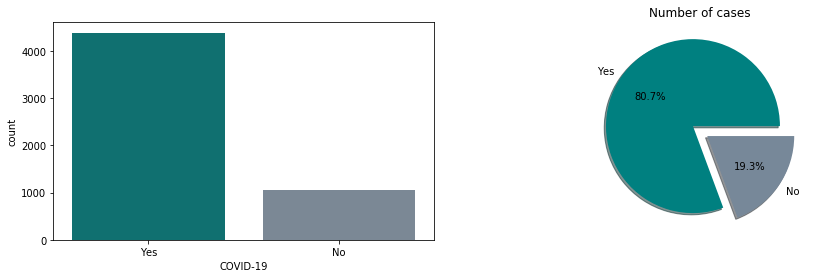

In [175]:
sns.set_palette(sns.color_palette(['teal', 'lightslategrey']))
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,4))
sns.countplot(x='COVID-19', data=dataset, ax=ax1)

covid = dataset["COVID-19"].value_counts()
ax2.pie(covid, labels=covid.index, explode=[0.1,0.1],autopct='%1.1f%%',shadow=True, colors=['teal', 'lightslategrey'])
ax2.set_title('Number of cases');

In the graphs below, it is possible to see the relationship between the presence of symptoms such as Fever or Dry Cough with the positivity of the Covid-19 test.

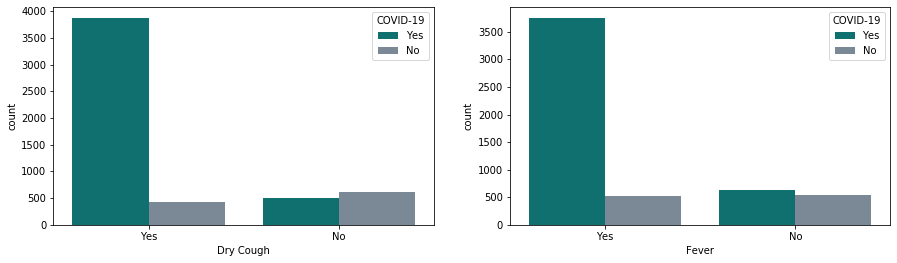

In [176]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,4))
sns.countplot(x='Dry Cough',hue='COVID-19',data=dataset, ax=ax1)

sns.countplot(x='Fever',hue='COVID-19',data=dataset, ax=ax2);

The relations between patients routine and the positivity of Covid-19 were then evaluated. Among them are Contact with COVID patients, Family working in Public Exposed Places, Attended Large Gathering and Abroad travel.

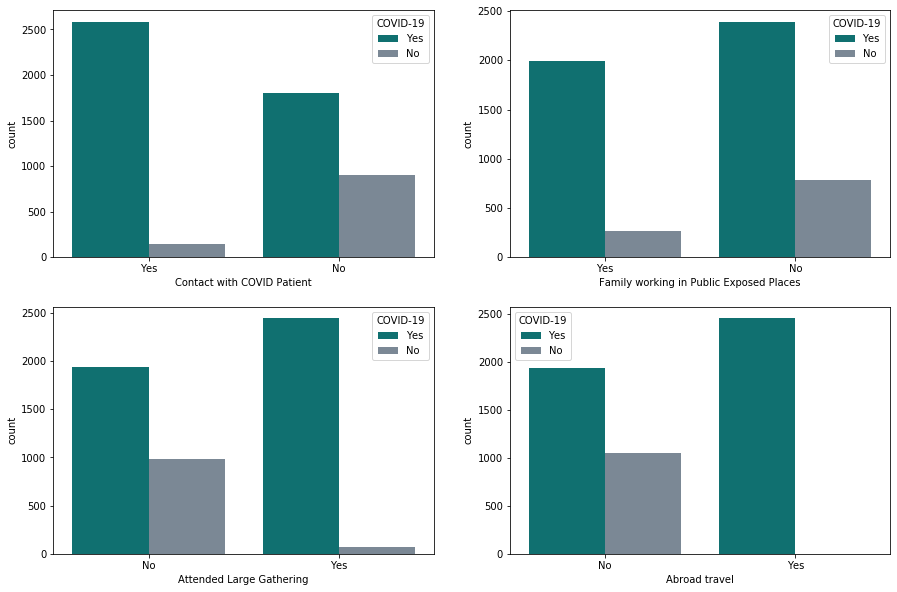

In [177]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15,10))
sns.countplot(x='Contact with COVID Patient',hue='COVID-19',data=dataset, ax=ax1)

sns.countplot(x='Family working in Public Exposed Places',hue='COVID-19',data=dataset, ax=ax2)

sns.countplot(x='Attended Large Gathering',hue='COVID-19',data=dataset, ax=ax3)

sns.countplot(x='Abroad travel',hue='COVID-19',data=dataset, ax=ax4);

Once the variables were all "Yes" or "No", we transform the variables into binary using LabelEncoder from ScikitLearn.

In [178]:
dataset = dataset.apply(preprocessing.LabelEncoder().fit_transform)
dataset

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,...,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
0,1,1,1,1,1,0,0,0,0,1,...,1,1,0,1,0,1,1,0,0,1
1,1,1,1,1,0,1,1,1,0,0,...,1,0,0,0,1,1,0,0,0,1
2,1,1,1,1,1,1,1,1,0,1,...,1,1,1,0,0,0,0,0,0,1
3,1,1,1,0,0,1,0,0,1,1,...,0,0,1,0,1,1,0,0,0,1
4,1,1,1,1,1,0,1,1,1,1,...,0,1,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5429,1,1,0,1,1,1,1,0,0,0,...,1,1,0,0,0,0,0,0,0,1
5430,1,1,1,0,1,1,0,1,0,1,...,1,0,0,0,0,0,0,0,0,1
5431,1,1,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5432,1,1,1,0,1,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0


It is possible to observe the correlation map between the features below.

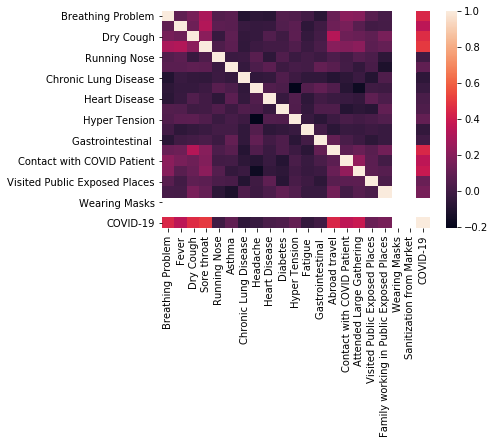

In [179]:
sns.heatmap(dataset.corr());

We can conclude by looking at the correlation map that the features that present themselves as the major cause of having Covid-19 are Breathing problem, Fever, Dry Cough, Sore throat and patients routine such as abroad travel, Contact with COVID Patient, Attended Large Gathering.

We then proceed to separate the input variables (X) from the output variable (y)

In [180]:
X = dataset.drop('COVID-19', axis=1)
y = dataset['COVID-19'].values

The construction of training and test sets was executed

In [181]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4347, 20)
(1087, 20)
(4347,)
(1087,)


The complexity of the model increases with the increase in the number of features, which can lead to the occurrence of overfitting. This happens when the model fits too well to the training dataset, but then cannot generalize to new examples that the model has never seen during training. In order to avoid this problem we can choose to reduce the number of features, in this case we used the SelectKBest class that selects the k features with the best score based on univariate statistical tests.

In [182]:
selector = SelectKBest(f_regression)

### Random Forest 

For first approach is used the Random Forest algorithm where the scikit Learn RandomForestClassifier class was used as estimator

In [183]:
estimator =  RandomForestClassifier()
estimator

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

The Pipeline class is used to chain a series of processing that is done to the data, in this case, the selection of the best k features using the selector estimator defined above and the model estimator itself.

In [184]:
pipeline = Pipeline([('selector', selector),('estimator',estimator)])

Then several hyperparameters were tested using the RandomizedSearchCV optimization method, which tests some random combinations of the search grid values, evaluating performance through cross-validation (3 folds). After defining the hyperparameter grid and the respective values to be tested, the best ones were chosen for the future construction of the model.

In [185]:
params_to_test = {'estimator__n_estimators':[100, 200, 500, 700, 1000],'selector__k':[5, 10, 15, 'all']}
        
randomized_search = RandomizedSearchCV(pipeline,params_to_test, cv=3)
randomized_search.fit(X,y)

rs_results = pd.DataFrame.from_dict(data=randomized_search.cv_results_)
rs_results.to_csv('rs_results(RF).csv',index=False)
rs_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_selector__k,param_estimator__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,3.069495,0.353220,0.251876,0.018097,all,700,"{'selector__k': 'all', 'estimator__n_estimator...",0.937086,0.910547,0.902816,0.916816,0.014676,5
1,2.669616,0.143185,0.227147,0.013094,15,700,"{'selector__k': 15, 'estimator__n_estimators':...",0.937086,0.920486,0.902816,0.920129,0.013993,3
2,3.690365,0.099563,0.324642,0.015945,15,1000,"{'selector__k': 15, 'estimator__n_estimators':...",0.937086,0.904473,0.902816,0.914792,0.015779,8
3,3.423507,0.007067,0.375415,0.100433,10,1000,"{'selector__k': 10, 'estimator__n_estimators':...",0.955298,0.915516,0.895638,0.922151,0.024804,1
4,1.631349,0.033551,0.147089,0.006170,5,500,"{'selector__k': 5, 'estimator__n_estimators': ...",0.956954,0.887355,0.717283,0.853864,0.100670,10
5,0.421976,0.018047,0.034640,0.006025,all,100,"{'selector__k': 'all', 'estimator__n_estimator...",0.932119,0.925456,0.902816,0.920130,0.012542,2
6,0.385081,0.011871,0.033587,0.006145,15,100,"{'selector__k': 15, 'estimator__n_estimators':...",0.937086,0.908338,0.911651,0.919025,0.012843,4
7,0.736942,0.009573,0.062810,0.003727,15,200,"{'selector__k': 15, 'estimator__n_estimators':...",0.937086,0.904473,0.902816,0.914792,0.015779,8
8,0.774636,0.006020,0.070580,0.007979,all,200,"{'selector__k': 'all', 'estimator__n_estimator...",0.932119,0.914412,0.902816,0.916449,0.012049,6
9,2.092325,0.064852,0.181367,0.007770,15,500,"{'selector__k': 15, 'estimator__n_estimators':...",0.937086,0.908338,0.902816,0.916080,0.015024,7


The best hyperparameters were:

In [186]:
randomized_search.best_params_

{'selector__k': 10, 'estimator__n_estimators': 1000}

Building the model using the best hyperparameters

In [187]:
best_pipeline = randomized_search.best_estimator_
best_pipeline

Pipeline(memory=None,
         steps=[('selector',
                 SelectKBest(k=10,
                             score_func=<function f_regression at 0x7fd242db84d0>)),
                ('estimator',
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=1000, n_jobs=None,
                                        oob_score=False, random_state=None,
                                        verbose=0, warm_start=Fa

Now cross validation is used to evaluate the model with the hyperparameters already optimized. In this step different metrics can be used, such as the accuracy, recall, precision and area under the curve (AUC).

In [189]:
scoring_metrics = ['accuracy', 'recall', 'precision', 'roc_auc']

cv_scores = cross_validate(best_pipeline, X, y, scoring=scoring_metrics, cv=5, return_train_score=False)

for key, value in cv_scores.items():
    if key != "fit_time" and key != "score_time":
        print("Metrics: %s" % key)
        print("Results for each fold: %s" % value) 
        print("Mean for all folds: %s" % np.mean(value))
        print("Standard deviation: %s" % np.std(value))

Metrics: test_accuracy
Results for each fold: [0.93100276 0.99172033 0.88776449 0.78656854 0.8664825 ]
Mean for all folds: 0.8927077244718683
Standard deviation: 0.06818758071426728
Metrics: test_recall
Results for each fold: [0.99201824 1.         0.91790194 0.73744292 0.92694064]
Mean for all folds: 0.9148607488167946
Standard deviation: 0.09469343048408066
Metrics: test_precision
Results for each fold: [0.92750533 0.98984199 0.94152047 0.99691358 0.90929451]
Mean for all folds: 0.9530151755814995
Standard deviation: 0.03457646824449246
Metrics: test_roc_auc
Results for each fold: [0.98633871 1.         0.94825433 0.94666623 0.86429115]
Mean for all folds: 0.9491100846281242
Standard deviation: 0.047279404174841985


The model is trained again with the complete dataset before being used to make predictions for test datasets.

In [190]:
modelRF = best_pipeline.fit(X_train,y_train)

In the case of the Random Forest algorithm it is possible to obtain information about the importance of each feature

In [191]:
ln = X.shape
names = X.columns.tolist()
feature_importances = sorted(zip(map(lambda x: round(x, 4), modelRF.named_steps['estimator'].feature_importances_),names), reverse=True)

feature_importances = pd.DataFrame.from_dict(data=feature_importances)
feature_importances.to_csv('feature_importances(RF).csv',index=False)

feature_importances.head()

,0,1
0,0.1812,Sore throat
1,0.1692,Breathing Problem
2,0.1687,Asthma
3,0.1510,Dry Cough
4,0.1114,Headache


Finally, we predicted the final results for the COVID-19 variable using the test dataset splited above and evaluate the performance of this results.

In [192]:
y_test_pred_rf = modelRF.predict(X_test)
y_test_pred_rf

array([1, 1, 1, ..., 1, 1, 1])

In [193]:
acc_rf = accuracy_score(y_test, y_test_pred_rf)
recall_rf = recall_score(y_test, y_test_pred_rf)
prec_rf = precision_score(y_test, y_test_pred_rf)
auc_rf = roc_auc_score(y_test, y_test_pred_rf)
acc_rf, recall_rf, prec_rf, auc_rf

(0.9668813247470102,
 0.9852941176470589,
 0.9742729306487695,
 0.9359968125181107)

The model can be saved for future use:

In [194]:
pickle.dump(modelRF, open('modelRF.pkl', 'wb'))

### Support Vector Machine

For this approach is used the Support Vector Machine algorithm where the scikit Learn SVR class was used as estimator.

In [195]:
estimator =  SVC(kernel = 'rbf')
estimator

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

The Pipeline class is used to chain a series of processing that is done to the data, in this case, the selection of the best k features using the selector estimator defined above and the model estimator itself.

In [196]:
pipeline = Pipeline([('selector', selector),('estimator', estimator)])

Then several hyperparameters were tested using the RandomizedSearchCV optimization method, which tests some random combinations of the search grid values, evaluating performance through cross-validation (3 folds). After defining the hyperparameter grid and the respective values to be tested, the best ones were chosen for the future construction of the model.

In [197]:
params_to_test = {'estimator__C':[0.1, 1, 10],'selector__k':[5, 10, 15, 'all']}
        
randomized_search = RandomizedSearchCV(pipeline,params_to_test, cv=3)
randomized_search.fit(X,y)

rs_results = pd.DataFrame.from_dict(data=randomized_search.cv_results_)
rs_results.to_csv('rs_results(SVM).csv',index=False)
rs_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_selector__k,param_estimator__C,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.365521,0.080218,0.076896,0.011076,all,1,"{'selector__k': 'all', 'estimator__C': 1}",0.970199,0.912755,0.905025,0.929326,0.029073,4
1,0.142007,0.031549,0.040618,0.008134,15,1,"{'selector__k': 15, 'estimator__C': 1}",0.958609,0.904473,0.899503,0.920862,0.026769,7
2,0.094192,0.021317,0.040966,0.019885,all,10,"{'selector__k': 'all', 'estimator__C': 10}",0.970199,0.912755,0.909994,0.930983,0.027753,3
3,0.089713,0.048633,0.026170,0.006819,5,10,"{'selector__k': 5, 'estimator__C': 10}",0.956954,0.887355,0.698509,0.847606,0.109189,9
4,0.079208,0.020725,0.023672,0.013187,5,1,"{'selector__k': 5, 'estimator__C': 1}",0.956954,0.887355,0.698509,0.847606,0.109189,9
5,0.105800,0.010547,0.032084,0.006215,10,1,"{'selector__k': 10, 'estimator__C': 1}",0.965232,0.939260,0.900055,0.934849,0.026790,2
6,0.083428,0.022744,0.021625,0.010023,10,10,"{'selector__k': 10, 'estimator__C': 10}",0.965232,0.941469,0.915516,0.940739,0.020303,1
7,0.174618,0.040588,0.051475,0.011910,10,0.1,"{'selector__k': 10, 'estimator__C': 0.1}",0.971854,0.914412,0.888459,0.924909,0.034845,6
8,0.302922,0.114968,0.095930,0.030866,all,0.1,"{'selector__k': 'all', 'estimator__C': 0.1}",0.974614,0.916621,0.894533,0.928589,0.033770,5
9,0.101109,0.024663,0.053404,0.024896,5,0.1,"{'selector__k': 5, 'estimator__C': 0.1}",0.956954,0.887355,0.805632,0.883314,0.061843,8


The best hyperparameters were:

In [198]:
randomized_search.best_params_

{'selector__k': 10, 'estimator__C': 10}

Building the model using the best hyperparameters

In [199]:
best_pipeline = randomized_search.best_estimator_
best_pipeline

Pipeline(memory=None,
         steps=[('selector',
                 SelectKBest(k=10,
                             score_func=<function f_regression at 0x7fd242db84d0>)),
                ('estimator',
                 SVC(C=10, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='rbf', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

Now cross validation is used to evaluate the model with the hyperparameters already optimized. In this step different metrics can be used, such as the accuracy, recall, precision and area under the curve (AUC).

In [200]:
scoring_metrics = ['accuracy', 'recall', 'precision', 'roc_auc']

cv_scores = cross_validate(best_pipeline, X, y, scoring=scoring_metrics, cv=5, return_train_score=False)

for key, value in cv_scores.items():
    if key != "fit_time" and key != "score_time":
        print("Metrics: %s" % key)
        print("Results for each fold: %s" % value) 
        print("Mean for all folds: %s" % np.mean(value))
        print("Standard deviation: %s" % np.std(value))

Metrics: test_accuracy
Results for each fold: [0.96964121 0.98344066 0.89604416 0.85096596 0.92081031]
Mean for all folds: 0.9241804618791306
Standard deviation: 0.04845992973541813
Metrics: test_recall
Results for each fold: [0.99201824 1.         0.9281642  0.8173516  0.9760274 ]
Mean for all folds: 0.942712287114124
Standard deviation: 0.06745339914440407
Metrics: test_precision
Results for each fold: [0.97098214 0.97988827 0.94212963 0.99721448 0.92934783]
Mean for all folds: 0.9639124702819639
Standard deviation: 0.024833192812053168
Metrics: test_roc_auc
Results for each fold: [0.99803442 1.         0.9335288  0.96918079 0.84450424]
Mean for all folds: 0.9490496513939014
Standard deviation: 0.05756969407827283


The model is trained again with the complete dataset before being used to make predictions for test datasets.

In [201]:
modelSVM = best_pipeline.fit(X_train,y_train)

Finally, we predicted the final results for the COVID-19 variable using the test dataset splited above and evaluate the performance of this results.

In [202]:
y_test_pred_svm = modelSVM.predict(X_test)
y_test_pred

array([0, 1, 1, ..., 1, 1, 1])

In [203]:
acc_svm = accuracy_score(y_test, y_test_pred_svm)
recall_svm = recall_score(y_test, y_test_pred_svm)
prec_svm = precision_score(y_test, y_test_pred_svm)
auc_svm = roc_auc_score(y_test, y_test_pred_svm)
acc_svm, recall_svm, prec_svm, auc_svm

(0.9668813247470102,
 0.9852941176470589,
 0.9742729306487695,
 0.9359968125181107)

The model can be saved for future use:

In [204]:
pickle.dump(modelSVM, open('modelSVM.pkl', 'wb'))

### Gradient Boosting

For this approach is used the Gradient Boosting algorithm where the scikit Learn GradientBoostingRegressor class was used as estimator.

In [205]:
estimator =  GradientBoostingClassifier()
estimator

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

The Pipeline class is used to chain a series of processing that is done to the data, in this case, the selection of the best k features using the selector estimator defined above and the model estimator itself.

In [206]:
pipeline = Pipeline([('selector', selector),('estimator', estimator)])

Then several hyperparameters were tested using the RandomizedSearchCV optimization method, which tests some random combinations of the search grid values, evaluating performance through cross-validation (3 folds). After defining the hyperparameter grid and the respective values to be tested, the best ones were chosen for the future construction of the model.

In [207]:
params_to_test = {'estimator__n_estimators':[100, 200, 500, 700, 1000],'selector__k':[5, 10, 15, 'all']}
        
randomized_search = RandomizedSearchCV(pipeline,params_to_test, cv=3)
randomized_search.fit(X,y)

rs_results = pd.DataFrame.from_dict(data=randomized_search.cv_results_)
rs_results.to_csv('rs_results(GB).csv',index=False)
rs_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_selector__k,param_estimator__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,1.336761,0.358824,0.011978,0.002047,5,500,"{'selector__k': 5, 'estimator__n_estimators': ...",0.956954,0.887355,0.768084,0.870798,0.077990,9
1,0.945207,0.052778,0.006483,0.000263,15,200,"{'selector__k': 15, 'estimator__n_estimators':...",0.953091,0.887355,0.900055,0.913500,0.028471,1
2,0.252406,0.017746,0.003716,0.000259,5,100,"{'selector__k': 5, 'estimator__n_estimators': ...",0.956954,0.887355,0.768084,0.870798,0.077990,9
3,0.755386,0.077245,0.013118,0.008394,10,200,"{'selector__k': 10, 'estimator__n_estimators':...",0.958609,0.889012,0.850359,0.899327,0.044791,3
4,2.264242,0.147018,0.016969,0.003882,all,500,"{'selector__k': 'all', 'estimator__n_estimator...",0.947020,0.886803,0.820541,0.884788,0.051654,8
5,2.929934,0.120182,0.019972,0.001986,all,700,"{'selector__k': 'all', 'estimator__n_estimator...",0.947020,0.892877,0.826063,0.888653,0.049471,6
6,4.172733,0.144970,0.028998,0.003592,all,1000,"{'selector__k': 'all', 'estimator__n_estimator...",0.947020,0.884042,0.834898,0.888653,0.045890,6
7,0.400255,0.017453,0.007532,0.000303,15,100,"{'selector__k': 15, 'estimator__n_estimators':...",0.945916,0.882938,0.886251,0.905035,0.028939,2
8,2.546013,0.320258,0.024770,0.003955,10,700,"{'selector__k': 10, 'estimator__n_estimators':...",0.955298,0.892325,0.836554,0.894726,0.048507,4
9,0.433667,0.005922,0.007699,0.002561,5,200,"{'selector__k': 5, 'estimator__n_estimators': ...",0.956954,0.887355,0.826615,0.890308,0.053251,5


The best hyperparameters were:

In [208]:
randomized_search.best_params_

{'selector__k': 15, 'estimator__n_estimators': 200}

Building the model using the best hyperparameters

In [209]:
best_pipeline = randomized_search.best_estimator_
best_pipeline

Pipeline(memory=None,
         steps=[('selector',
                 SelectKBest(k=15,
                             score_func=<function f_regression at 0x7fd242db84d0>)),
                ('estimator',
                 GradientBoostingClassifier(ccp_alpha=0.0,
                                            criterion='friedman_mse', init=None,
                                            learning_rate=0.1, loss='deviance',
                                            max_depth=3, max_features=None,
                                            max_leaf_nodes=None,
                                            min_impurity_decrease=0.0,
                                            min_impurity_split=None,
                                            min_samples_leaf=1,
                                            min_samples_split=2,
                                            min_weight_fraction_leaf=0.0,
                                            n_estimators=200,
                                 

Now cross validation is used to evaluate the model with the hyperparameters already optimized. In this step different metrics can be used, such as the accuracy, recall, precision and area under the curve (AUC).

In [210]:
scoring_metrics = ['accuracy', 'recall', 'precision', 'roc_auc']

cv_scores = cross_validate(best_pipeline, X, y, scoring=scoring_metrics, cv=5, return_train_score=False)

for key, value in cv_scores.items():
    if key != "fit_time" and key != "score_time":
        print("Metrics: %s" % key)
        print("Results for each fold: %s" % value) 
        print("Mean for all folds: %s" % np.mean(value))
        print("Standard deviation: %s" % np.std(value))

Metrics: test_accuracy
Results for each fold: [0.92916283 0.97516099 0.84268629 0.84544618 0.87661142]
Mean for all folds: 0.8938135439591625
Standard deviation: 0.05121775178102756
Metrics: test_recall
Results for each fold: [0.98973774 1.         0.86202965 0.81050228 0.90182648]
Mean for all folds: 0.912819231189766
Standard deviation: 0.07305631262077253
Metrics: test_precision
Results for each fold: [0.92735043 0.97013274 0.93796526 0.99719101 0.94272076]
Mean for all folds: 0.955072041243654
Standard deviation: 0.025355536912514617
Metrics: test_roc_auc
Results for each fold: [0.97856871 0.99692132 0.93816583 0.95887165 0.90322896]
Mean for all folds: 0.9551512945261125
Standard deviation: 0.03253117430757581


The model is trained again with the complete dataset before being used to make predictions for test datasets.

In [211]:
modelGB = best_pipeline.fit(X, y)

In the case of the Gradient Boosting algorithm, like Random Forest, it is possible to obtain information about the importance of each feature

In [212]:
ln = X.shape
names = X.columns.tolist()
feature_importances = sorted(zip(map(lambda x: round(x, 4), modelGB.named_steps['estimator'].feature_importances_),names), reverse=True)

feature_importances = pd.DataFrame.from_dict(data=feature_importances)
feature_importances.to_csv('feature_importances(GB).csv',index=False)

feature_importances.head()

,0,1
0,0.2367,Hyper Tension
1,0.2366,Sore throat
2,0.2136,Breathing Problem
3,0.1229,Dry Cough
4,0.0993,Gastrointestinal


Finally, we predicted the final results for the COVID-19 variable using the test dataset splited above and evaluate the performance of this results.

In [213]:
y_test_pred_gb = modelGB.predict(X_test)
y_test_pred_gb

array([1, 1, 1, ..., 1, 1, 1])

In [214]:
acc_gb = accuracy_score(y_test, y_test_pred_gb)
recall_gb = recall_score(y_test, y_test_pred_gb)
prec_gb = precision_score(y_test, y_test_pred_gb)
auc_gb = roc_auc_score(y_test, y_test_pred_gb)
acc_gb, recall_gb, prec_gb, auc_gb

(0.9806807727690893,
 0.9875565610859729,
 0.9886749716874292,
 0.9691477386710652)

The model can be saved for future use:

In [215]:
pickle.dump(modelGB, open('modelGB.pkl', 'wb'))

### Error Estimation Boxplot

The cross validation results were evaluated and charted in order to better understand what happened when the model was built. First, for the **accuracy** metric we can get the following boxplot

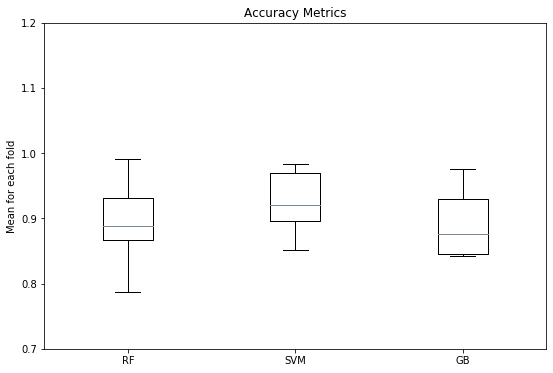

In [221]:
eachfoldRF = [0.93100276, 0.99172033, 0.88776449, 0.78656854, 0.8664825 ]

eachfoldSVM = [0.96964121, 0.98344066, 0.89604416, 0.85096596, 0.92081031]

eachfoldGB = [0.92916283, 0.97516099, 0.84268629, 0.84544618, 0.87661142]

data_to_plot = [eachfoldRF, eachfoldSVM, eachfoldGB]
fig = plt.figure(1, figsize=(9, 6))
ax = fig.add_subplot(111)
ax.boxplot(data_to_plot)
ax.set_ylabel('Mean for each fold')
ax.set_title('Accuracy Metrics')
plt.xticks([1, 2, 3], ['RF', 'SVM', 'GB'])
plt.ylim(0.7, 1.2)
fig.savefig('acc_metrics.png', bbox_inches='tight')

The boxplot obtained by the metric **recall** is now shown

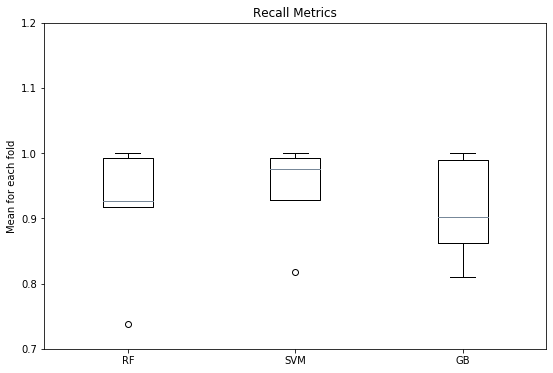

In [222]:
eachfoldRF = [0.99201824, 1., 0.91790194, 0.73744292, 0.92694064]

eachfoldSVM = [0.99201824, 1., 0.9281642, 0.8173516, 0.9760274 ]

eachfoldGB = [0.98973774, 1., 0.86202965, 0.81050228, 0.90182648]

data_to_plot = [eachfoldRF, eachfoldSVM, eachfoldGB]
fig = plt.figure(1, figsize=(9, 6))
ax = fig.add_subplot(111)
ax.boxplot(data_to_plot)
ax.set_ylabel('Mean for each fold')
ax.set_title('Recall Metrics')
plt.xticks([1, 2, 3], ['RF', 'SVM', 'GB'])
plt.ylim(0.7, 1.2)
fig.savefig('recall_metrics.png', bbox_inches='tight')

The boxplot obtained by the metric **precision** is now shown

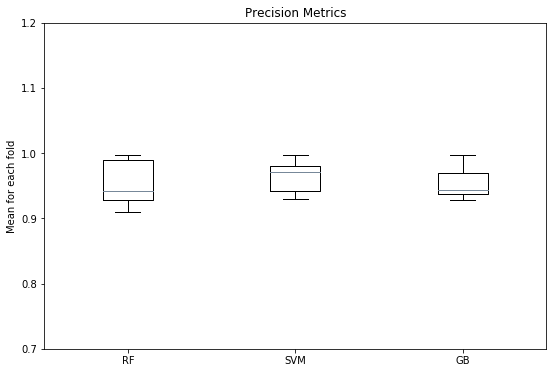

In [223]:
eachfoldRF = [0.92750533, 0.98984199, 0.94152047, 0.99691358, 0.90929451]

eachfoldSVM = [0.97098214, 0.97988827, 0.94212963, 0.99721448, 0.92934783]

eachfoldGB = [0.92735043, 0.97013274, 0.93796526, 0.99719101, 0.94272076]

data_to_plot = [eachfoldRF, eachfoldSVM, eachfoldGB]
fig = plt.figure(1, figsize=(9, 6))
ax = fig.add_subplot(111)
ax.boxplot(data_to_plot)
ax.set_ylabel('Mean for each fold')
ax.set_title('Precision Metrics')
plt.xticks([1, 2, 3], ['RF', 'SVM', 'GB'])
plt.ylim(0.7, 1.2)
fig.savefig('precision_metrics.png', bbox_inches='tight')

The boxplot obtained by the metric **Area Under the Curve (AUC)** is now shown

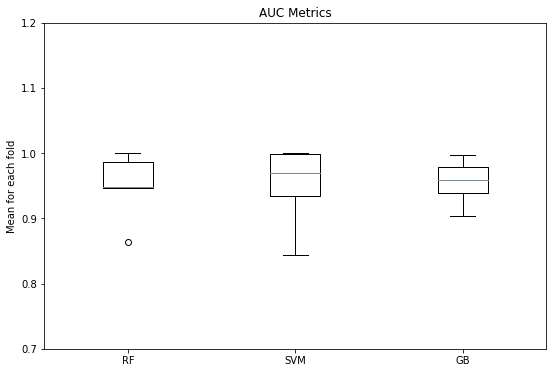

In [224]:
eachfoldRF = [0.98633871, 1., 0.94825433, 0.94666623, 0.86429115]

eachfoldSVM = [0.99803442, 1., 0.9335288, 0.96918079, 0.84450424]

eachfoldGB = [0.97856871, 0.99692132, 0.93816583, 0.95887165, 0.90322896]

data_to_plot = [eachfoldRF, eachfoldSVM, eachfoldGB]
fig = plt.figure(1, figsize=(9, 6))
ax = fig.add_subplot(111)
ax.boxplot(data_to_plot)
ax.set_ylabel('Mean for each fold')
ax.set_title('AUC Metrics')
plt.xticks([1, 2, 3], ['RF', 'SVM', 'GB'])
plt.ylim(0.7, 1.2)
fig.savefig('AUC_metrics.png', bbox_inches='tight')

In [220]:
models = pd.DataFrame({
    'Model': ['Random Forest', 'Support Vector Machine', 'Gradient Boosting'],
    'Accuracy': [acc_rf, acc_svm, acc_gb],
    'Recall': [recall_rf, recall_svm, recall_gb],
    'Precision': [prec_rf, prec_svm, prec_gb],
    'AUC':[auc_rf, auc_svm, auc_gb]})
models.set_index('Model')

,Accuracy,Recall,Precision,AUC
Model,,,,
Random Forest,0.966881,0.985294,0.974273,0.935997
Support Vector Machine,0.966881,0.985294,0.974273,0.935997
Gradient Boosting,0.980681,0.987557,0.988675,0.969148
